### samsung 주가 데이터 읽기 (yfinance API활용)

In [1]:
import pandas as pd
import yfinance as yf

In [3]:
start='2000-01-04'
end='2024-08-31'
symbol='005930.KS' #yahoo finacnce에서 samsung전자의 유효코드값. 
#https://finance.yahoo.com/quote/005930.KS/history/?period1=946944000&period2=1726670118 에서 확인할 수 있음
df=yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.951660,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.685059,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.684814,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.683105,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4183.441406,46880000


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-26,78100.0,78200.0,76000.0,76100.0,76100.0,15655938
2024-08-27,75700.0,76500.0,75600.0,75800.0,75800.0,11130145
2024-08-28,75800.0,76400.0,75400.0,76400.0,76400.0,9794514
2024-08-29,73600.0,74700.0,73500.0,74000.0,74000.0,16884479
2024-08-30,74400.0,75000.0,74100.0,74300.0,74300.0,16358520


In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

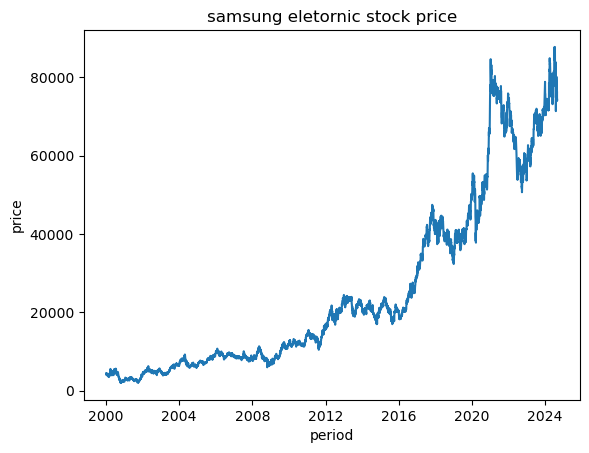

In [16]:
plt.title('samsung eletornic stock price')
plt.ylabel('price')
plt.xlabel('period')

plt.plot(df['Adj Close'], label='Adj Close')
plt.show()

### 데이터 전처리

In [21]:
#통계정보확인
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6182.000000,6182.000000,6182.000000,6182.000000,6182.000000,6.182000e+03
mean,28836.096732,29114.422517,28544.809123,28824.839858,24894.847346,2.116084e+07
std,23023.558211,23203.766100,22821.949746,22999.799991,22476.681029,1.502046e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,1979.339966,0.000000e+00
25%,10800.000000,10945.000000,10640.000000,10785.000000,7902.859863,1.170369e+07
50%,21720.000000,21980.000000,21460.000000,21670.000000,16988.235352,1.715452e+07
75%,46142.500000,46500.000000,45642.500000,46080.000000,39283.429688,2.610688e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,87800.000000,1.642150e+08


In [25]:
#missing data확인
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 3MA, 5MA 예측의 정확도를 높이기 위해 가격이동평균선 추가

In [28]:
df['3MA'] = df['Adj Close'].rolling(window=3).mean()
df['5MA'] = df['Adj Close'].rolling(window=5).mean()

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
Date,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4429.951660,74195000,NaN,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4045.685059,74680000,NaN,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4074.684814,54390000,4183.440511,NaN
2000-01-07,5560.0,5670.0,5360.0,5540.0,4016.683105,40305000,4045.684326,NaN
2000-01-10,5600.0,5770.0,5580.0,5770.0,4183.441406,46880000,4091.603109,4150.089209


In [32]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          2
5MA          4
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6182 entries, 2000-01-04 to 2024-08-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6182 non-null   float64
 1   High       6182 non-null   float64
 2   Low        6182 non-null   float64
 3   Close      6182 non-null   float64
 4   Adj Close  6182 non-null   float64
 5   Volume     6182 non-null   int64  
 6   3MA        6180 non-null   float64
 7   5MA        6178 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 434.7 KB


In [40]:
# 최소값이 0 인 column 체크
for col in df.columns:
    if df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

Volume <class 'str'>


In [46]:
df.loc[df['Volume']==0]

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
Date,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,3719.420166,0,3748.420817,3829.624707
2000-03-01,5120.0,5120.0,5120.0,5120.0,3712.168945,0,3634.832275,3658.516455
2000-04-05,6800.0,6800.0,6800.0,6800.0,4930.224609,0,5002.728027,4995.477344
2000-04-13,6910.0,6910.0,6910.0,6910.0,5009.979004,0,5055.897624,5136.133887
2000-05-01,6000.0,6000.0,6000.0,6000.0,4350.199219,0,4205.192546,4152.989697
...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,68119.820312,0,67993.500000,68953.556250
2022-03-04,72900.0,72900.0,72900.0,72900.0,69067.257812,0,68688.281250,68460.896875
2022-03-10,69500.0,69500.0,69500.0,69500.0,65846.015625,0,66035.494792,67248.200000


In [50]:
# 각 column에 0 몇개인지 확인
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 127
3MA: 0
5MA: 0


In [54]:
# 먼저 0 을 NaN 으로 바꾼후, Missing Data 처리
df['Volume'] = df['Volume'].replace(0, np.nan)

# 각 column에 0 몇개인지 확인

for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0
3MA: 0
5MA: 0


In [58]:
# missing data 확인
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
3MA            2
5MA            4
dtype: int64

In [62]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume        True
3MA           True
5MA           True
dtype: bool

In [68]:
df.loc[df['Volume'].isna()]

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
Date,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,3719.420166,NaN,3748.420817,3829.624707
2000-03-01,5120.0,5120.0,5120.0,5120.0,3712.168945,NaN,3634.832275,3658.516455
2000-04-05,6800.0,6800.0,6800.0,6800.0,4930.224609,NaN,5002.728027,4995.477344
2000-04-13,6910.0,6910.0,6910.0,6910.0,5009.979004,NaN,5055.897624,5136.133887
2000-05-01,6000.0,6000.0,6000.0,6000.0,4350.199219,NaN,4205.192546,4152.989697
...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,68119.820312,NaN,67993.500000,68953.556250
2022-03-04,72900.0,72900.0,72900.0,72900.0,69067.257812,NaN,68688.281250,68460.896875
2022-03-10,69500.0,69500.0,69500.0,69500.0,65846.015625,NaN,66035.494792,67248.200000


In [70]:
# missing data 처리
df = df.dropna()
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [72]:
# 정규화 (Date 제외한 모든 수치부분 정규화)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close',
              '3MA', '5MA', 'Volume'] #정규화할 대상 column 정의
scaled_df = scaler.fit_transform(df[scale_cols])
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols) #넘파이를 dataframe화

print(scaled_df) #numpy값으로 리턴하고 있음

          Open      High       Low     Close  Adj Close       3MA       5MA  \
0     0.034868  0.032008  0.036288  0.034440   0.025683  0.024137  0.024544   
1     0.037375  0.035517  0.038470  0.034440   0.025683  0.024560  0.023968   
2     0.034982  0.031689  0.036518  0.033873   0.025260  0.025067  0.024205   
3     0.034868  0.031689  0.036059  0.033760   0.025176  0.024898  0.024358   
4     0.036235  0.033177  0.037437  0.035120   0.026190  0.025067  0.024850   
...        ...       ...       ...       ...        ...       ...       ...   
6046  0.860985  0.802212  0.844970  0.831200   0.863669  0.879050  0.886768   
6047  0.833637  0.784134  0.840377  0.827801   0.860174  0.869328  0.879515   
6048  0.834777  0.783071  0.838080  0.834598   0.867165  0.864272  0.875070   
6049  0.809708  0.764994  0.816261  0.807409   0.839200  0.856105  0.865011   
6050  0.818824  0.768184  0.823151  0.810808   0.842695  0.850271  0.857056   

        Volume  
0     0.285359  
1     0.363715  


### 딥러닝을 위한 input data/output data /window size 정의

주가예측을 위해 '임의로' 3MA, 5MA, Adj Close 항목을 feature 선정
정답은 Adj Close 선정, 시계열 데이터를 위한 window_size = 40 선정

In [75]:
# feature_df, label_df 생성
feature_cols = [ '3MA', '5MA', 'Adj Close' ]
label_cols = [ 'Adj Close' ]


label_df = pd.DataFrame(scaled_df, columns=label_cols)
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)

print(feature_df)
print(label_df)

           3MA       5MA  Adj Close
0     0.024137  0.024544   0.025683
1     0.024560  0.023968   0.025683
2     0.025067  0.024205   0.025260
3     0.024898  0.024358   0.025176
4     0.025067  0.024850   0.026190
...        ...       ...        ...
6046  0.879050  0.886768   0.863669
6047  0.869328  0.879515   0.860174
6048  0.864272  0.875070   0.867165
6049  0.856105  0.865011   0.839200
6050  0.850271  0.857056   0.842695

[6051 rows x 3 columns]
      Adj Close
0      0.025683
1      0.025683
2      0.025260
3      0.025176
4      0.026190
...         ...
6046   0.863669
6047   0.860174
6048   0.867165
6049   0.839200
6050   0.842695

[6051 rows x 1 columns]


In [83]:
# 딥러닝 학습을 위해 dataframe -> numpy로 변환
label_np=label_df.to_numpy()
feature_np=feature_df.to_numpy()
print(feature_np.shape, label_np.shape)

(6051, 3) (6051, 1)


### 시계열 데이터 생성 (make_sequence_dataset)

In [92]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [96]:
window_size=40
X, Y = make_sequene_dataset(feature_np, label_np, window_size)
print(X.shape,Y.shape)

(6011, 40, 3) (6011, 1)


### traning/test data split

In [101]:
# train, test 분리

#split = int(len(X)*0.95)
split = int(len(X)*0.95)

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5710, 40, 3) (5710, 1)
(301, 40, 3) (301, 1)


### LSTM 모델 구축

In [105]:
model=Sequential()

In [107]:
model.add(LSTM(128, activation='tanh', #LSTM계층에 Tanh를 활성화함수로 가지는 노드수 128개 
               input_shape=x_train[0].shape)) #input shape=(40,3) 
model.add(Dense(1, activation='linear'))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,713 (264.50 KB)

 Trainable params: 67,713 (264.50 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=16,callbacks=[early_stop])

Epoch 1/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0044 - mae: 0.0276 - val_loss: 0.0011 - val_mae: 0.0265
Epoch 2/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.4270e-04 - mae: 0.0073 - val_loss: 6.8062e-04 - val_mae: 0.0195
Epoch 3/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.3870e-04 - mae: 0.0072 - val_loss: 5.7329e-04 - val_mae: 0.0178
Epoch 4/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.2397e-04 - mae: 0.0070 - val_loss: 5.9839e-04 - val_mae: 0.0184
Epoch 5/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.0871e-04 - mae: 0.0066 - val_loss: 6.4778e-04 - val_mae: 0.0201
Epoch 6/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.1769e-04 - mae: 0.0070 - val_loss: 9.7169e-04 - val_mae: 0.0259
Epoch 7/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.1118e-04 - mae: 0.0066 - val_loss: 4.7291e-04 - val_mae: 0.0168
Epoch 8/100
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 8.3971e-05 - mae: 0.0058 - val_loss: 3.9533e-04 - val_

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


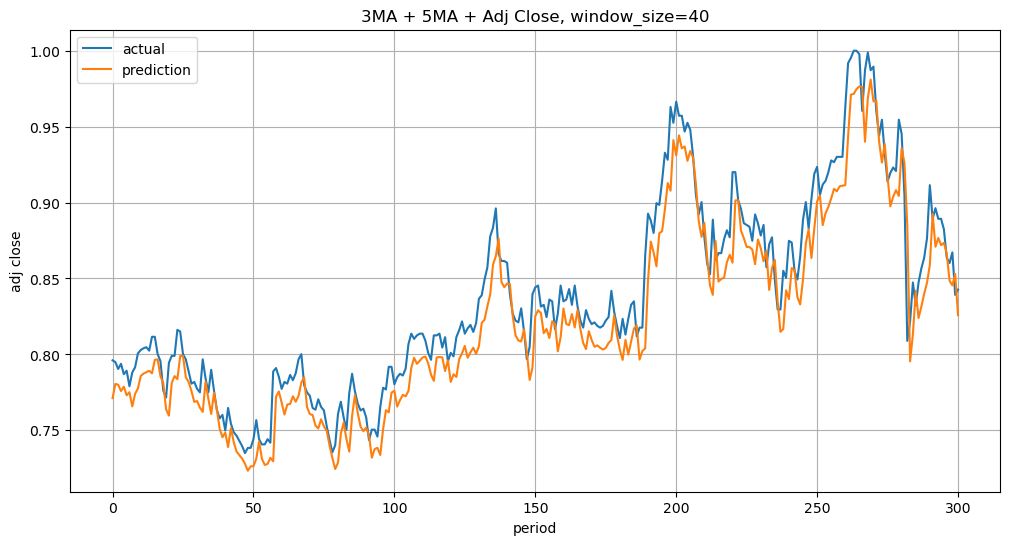

In [115]:
pred = model.predict(x_test)

plt.figure(figsize=(12, 6))
plt.title('3MA + 5MA + Adj Close, window_size=40')
plt.ylabel('adj close')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()